# 3D Plot for the 12 Games Predictions

This file is part of the reproduction package provided with the paper Stationary Equilibria in Behavioral Game Theory: An Experimental Analysis of Inspection Games.

In this code, we generate the 3D plot with the Q values from 12 games experiment document in Selten & Chmura (2018).

Questions and correspondence should be addressed to Vinícius Ferraz (visferraz@gmail.com)

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
df=pd.read_csv('data_selten_games/selten_predictions.csv')

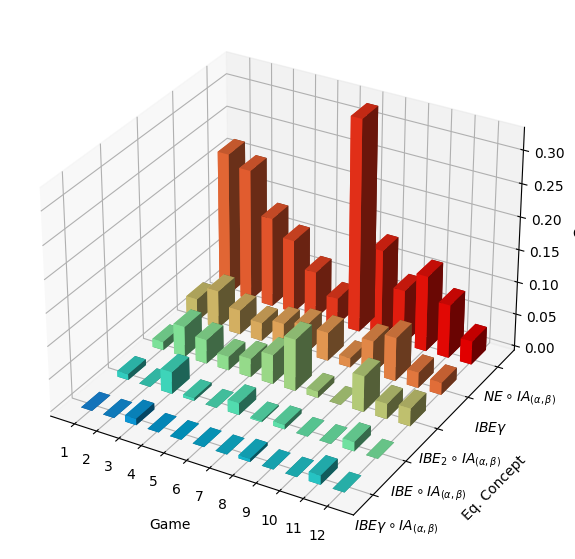

In [7]:
# Create the pivot table
pivot_table = df.pivot_table(values='q', index='eq_concept_2', columns='game')

# Create a new DataFrame with the 'eq_concept_2' and 'order' columns
order_df = df[['eq_concept_2', 'order']].drop_duplicates()

# Merge the order_df with the pivot_table on 'eq_concept_2'
pivot_table = pivot_table.merge(order_df, left_index=True, right_on='eq_concept_2')

# Sort the merged pivot table based on the 'order' column
pivot_table = pivot_table.sort_values('order').set_index('eq_concept_2').drop('order', axis=1)


fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Game', labelpad=10)
ax1.set_ylabel('Eq. Concept', labelpad=17)
ax1.set_zlabel('Q', labelpad=5)

xlabels = df['game'].unique()
xpos = np.arange(xlabels.shape[0])
ylabels = pivot_table.index
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos = pivot_table.values

dx = 0.5
dy = 0.5
dz = zpos.ravel()

ax1.xaxis.set_ticks(xpos + dx / 2.)
ax1.xaxis.set_ticklabels(xlabels)

ax1.yaxis.set_ticks(ypos + dy / 2.)
ax1.yaxis.set_ticklabels(ylabels)
ax1.tick_params(axis='y', which='major', pad=7)
values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz * 0, dx, dy, dz, color=colors)
plt.show()

In [17]:
mean_q = df.groupby('eq')['q'].mean()
mean_q

eq
ibegamma      0.038013
ibegammaia    0.002406
ibeia         0.007355
ibeia2        0.032062
neia          0.130836
Name: q, dtype: float64